<a href="https://colab.research.google.com/github/felixzhao/AIML425-ASSN-2/blob/main/P1_AIML425_Assn_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import random
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.gridspec as gridspec

# two-dimensional (2D) Z ∼ N (0, I)

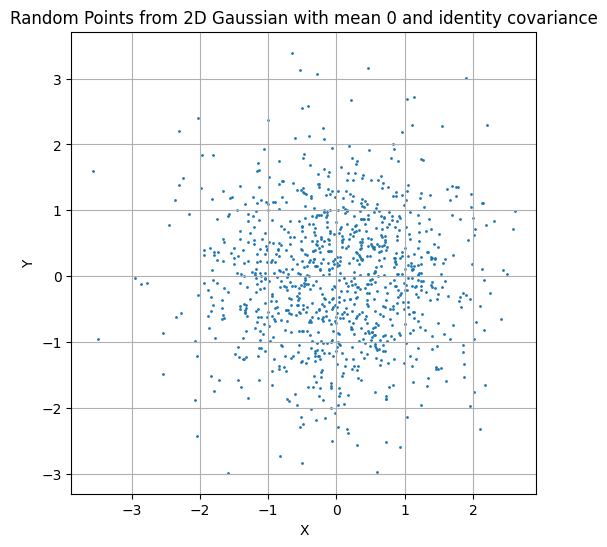

In [ ]:
def generate_2d_gaussian(num_points=1):
    mean = [0, 0]
    covariance_matrix = [[1, 0], [0, 1]]  # Identity matrix
    return np.random.multivariate_normal(mean, covariance_matrix, num_points)

# Generate multiple points
num_points = 1000
X = generate_2d_gaussian(num_points)

# Extract x and y coordinates for plotting
x_coords, y_coords = X[:, 0], X[:, 1]

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(x_coords, y_coords, s=1)
plt.title("Random Points from 2D Gaussian with mean 0 and identity covariance")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


# 2D uniform Y
Y has
a uniform density of 1 in a 2D square box (2-cube; edges have length 1)

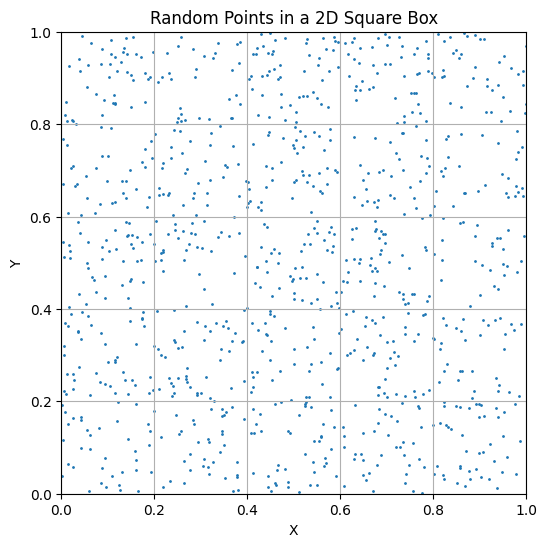

In [ ]:
def generate_point_in_unit_square():
    x = random.uniform(0, 1)
    y = random.uniform(0, 1)
    return (x, y)

# Generate multiple points
num_points = 1000
Y = [generate_point_in_unit_square() for _ in range(num_points)]

# Extract x and y coordinates for plotting
x_coords, y_coords = zip(*Y)

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(x_coords, y_coords, s=1)  # s=1 sets the point size to a small value
plt.title("Random Points in a 2D Square Box")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


# Train a fully connected neural network f1 of your design that converts a two-dimensional (2D) Z ∼ N (0, I) into a 2D uniform Y . That is, Y has a uniform density of 1 in a 2D square box (2-cube; edges have length 1).

-  split dataset to train, test, val
- plot test_outputs

In [ ]:
# Generate dataset
num_samples = 10000
z = np.random.randn(num_samples, 2)  # Z ~ N(0, I)
y = np.random.uniform(0, 1, (num_samples, 2))  # Target Y

# Shuffle and split data
indices = np.arange(num_samples)
np.random.shuffle(indices)

train_idx = indices[:int(0.8 * num_samples)]
val_idx = indices[int(0.8 * num_samples):int(0.9 * num_samples)]
test_idx = indices[int(0.9 * num_samples):]

z_train, y_train = z[train_idx], y[train_idx]
z_val, y_val = z[val_idx], y[val_idx]
z_test, y_test = z[test_idx], y[test_idx]

# Convert data to tensors
z_train, y_train = torch.tensor(z_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32)
z_val, y_val = torch.tensor(z_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.float32)
z_test, y_test = torch.tensor(z_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32)

In [ ]:
# Neural Network Design
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))  # Output should be in [0, 1], so we use sigmoid
        return x

In [ ]:
model = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 50

In [15]:

train_losses = []
val_losses = []

# Training loop
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(z_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    # Validation loss
    with torch.no_grad():
        val_outputs = model(z_val)
        val_loss = criterion(val_outputs, y_val)

        val_losses.append(val_loss.item())

    if epoch % 10 == 0:
        print(f'Epoch {epoch}/{epochs}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}')

print('Training complete!')

# Test the model
with torch.no_grad():
    test_outputs = model(z_test)
    test_loss = criterion(test_outputs, y_test)
    print(f"Test Loss: {test_loss.item()}")


Epoch 0/50, Training Loss: 0.083426833152771, Validation Loss: 0.08221183717250824
Epoch 10/50, Training Loss: 0.08339309692382812, Validation Loss: 0.08221626281738281
Epoch 20/50, Training Loss: 0.08335720002651215, Validation Loss: 0.08222606778144836
Epoch 30/50, Training Loss: 0.08331896364688873, Validation Loss: 0.08223474025726318
Epoch 40/50, Training Loss: 0.0832798033952713, Validation Loss: 0.08224152773618698
Training complete!
Test Loss: 0.08348618447780609


In [44]:
def plot_loss(train_losses, val_losses, ax):
    ax.set_title("Training and Validation Loss of Model")
    ax.plot(train_losses,label="Training")
    ax.plot(val_losses,label="Validation")
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Loss")
    ax.legend()
    ax.grid(True)

In [40]:
def plot_y(y, ax):
    y_np = y.numpy()

    # Extract x and y coordinates for plotting
    x_coords, y_coords = y_np[:, 0], y_np[:, 1]

    # Plot on the provided axes
    ax.scatter(x_coords, y_coords, s=1)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.grid(True)

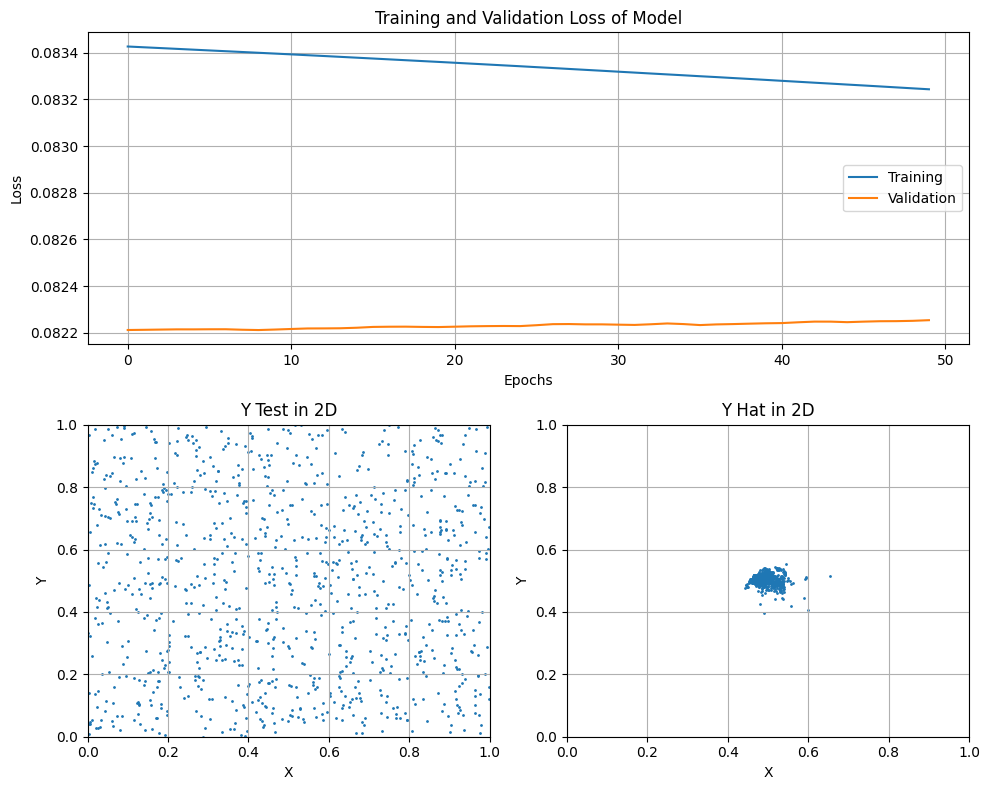

In [46]:
# Create figure
fig = plt.figure(figsize=(10, 8))

# Define the grid layout
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1])

# Define the axes using the grid layout
ax1 = plt.subplot(gs[0, :])  # This axis spans both columns of the first row
ax2 = plt.subplot(gs[1, 0])
ax3 = plt.subplot(gs[1, 1])

# Plot on the defined axes
plot_loss(train_losses, val_losses, ax1)
plot_y(y_test, ax2)
ax2.set_title("Y Test in 2D")
plot_y(val_outputs, ax3)
ax3.set_title("Y Hat in 2D")

plt.tight_layout()
plt.show()